In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("D:/AI_Intern/ScreenTime vs MentalWellness.csv")

In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (400, 16)
Columns: ['user_id', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15']


In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Fill missing numeric with median, categorical with mode
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
# categorical encoding (convert object columns to category codes)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes


print("✅ Preprocessing complete")

✅ Preprocessing complete


In [9]:
X = df[['screen_time_hours']] # features
y = df['mental_wellness_index_0_100'] # target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 320
Test size: 80


In [12]:
# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)


print("✅ Model trained")
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

✅ Model trained
Intercept: 68.2172153131565
Coefficient: -5.3906896252064875


In [13]:
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("\nEvaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)


Evaluation Metrics:
MAE: 13.411238741384375
MSE: 299.3299626266992
R^2: 0.2432031518098512


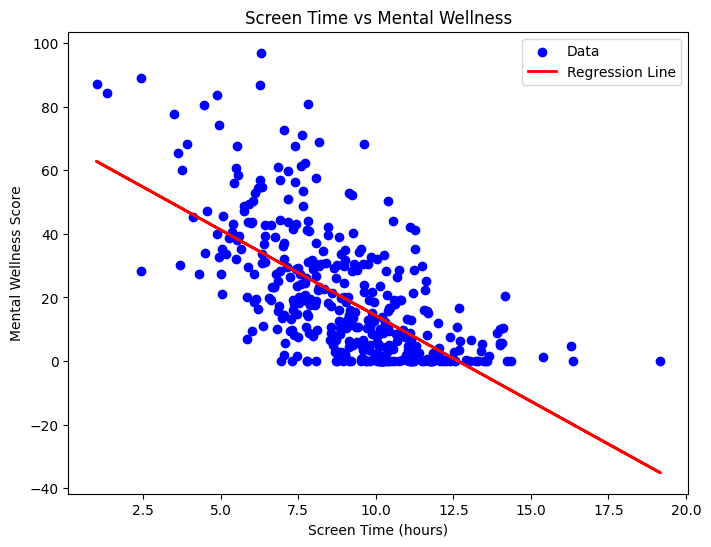

In [15]:
# Plot regression line

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel("Screen Time (hours)")
plt.ylabel("Mental Wellness Score")
plt.title("Screen Time vs Mental Wellness")
plt.legend()
plt.show()

In [16]:
print("Interpretation:")
print(f"Each additional hour of screen time is associated with a change of {model.coef_[0]:.2f} units in Mental Wellness Score.")
print("The intercept represents the expected Mental Wellness Score when Screen Time = 0.")

Interpretation:
Each additional hour of screen time is associated with a change of -5.39 units in Mental Wellness Score.
The intercept represents the expected Mental Wellness Score when Screen Time = 0.
